# Super Bowl Prediction

## Rams Wins

### Result: 
### Los Angeles Rams VS. New England Patriots:
### 29 : 27

Unlike to predict the other kinds of categories, to predict the result of sports should use the latest data. The change of player/coach or the strategy/tactic the team uses could heavily affect the prediction. In this case, to preform this prediction for Super Bowl, I use the data from NFL 2018 season.

I used all the gaming result as my dataset to develop a linear regression. As we can see in the following, both of the plot and score show a strong linear relationship.

Regarding the Game Location, I set it to dummy variables. Since Rams will be the home team, I manually changed it to 1 as HOME, and the Game Location for Patriots is 0 as AWAY.

In order to conduct the prediction, I used the average performance of each team (Rams and Patriots) as the values and got the final result of 29:27, Rams wins. I chose the average as the values is beacuse I believe the average could show how the team is currently doing.

Please see the following for the prediction model.

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [69]:
FEATURE_LIST = ['Game Location',
                'Team_Rushing',
                'Team_Passing', 
                'Total Team Yards', 
                'Team_Turnovers', 
                'Opponent_Passing', 
                'Opponent_Rushing',
                'Total Opponent Yards',
                'Opponent_Turnovers']
LABEL_COL = 'Team_Score'

In [70]:
data = pd.read_excel("./NFL+2018+Season+Data.xlsx")
data['Game Location'] = data['Game Location'].map({"HOME": 1, "AWAY": 0})
data.head()

,Team,Opponent,Game Number,Game Location,Team_Score,Opponent_Score,Team_Passing,Team_Rushing,Total Team Yards,Team_Turnovers,Opponent_Passing,Opponent_Rushing,Total Opponent Yards,Opponent_Turnovers
0,Arizona Cardinals,Washington Redskins,1,1,6.0,24.0,145.0,68.0,213,2,247.0,182.0,429,1
1,Arizona Cardinals,Los Angeles Rams,2,0,0.0,34.0,83.0,54.0,137,1,342.0,90.0,432,1
2,Arizona Cardinals,Chicago Bears,3,1,14.0,16.0,168.0,53.0,221,4,194.0,122.0,316,2
3,Arizona Cardinals,Seattle Seahawks,4,1,17.0,20.0,171.0,92.0,263,1,160.0,171.0,331,0
4,Arizona Cardinals,San Francisco 49ers,5,0,28.0,18.0,164.0,56.0,220,0,300.0,147.0,447,5


In [71]:
X = data[FEATURE_LIST]
Y = data[LABEL_COL]

In [72]:
X = np.nan_to_num(X)
Y = np.nan_to_num(Y)

In [73]:
lm = linear_model.LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
print(lm.coef_)
print(lm.intercept_)
print(lm.score(X,Y))

[ 1.76858904e-01  3.16540737e-02  1.94117678e-02  5.10658415e-02
 -1.99993211e+00  7.82409572e-03 -7.74042960e-03  8.36661208e-05
  2.18736206e+00]
-4.233929727327848
0.602634618717184


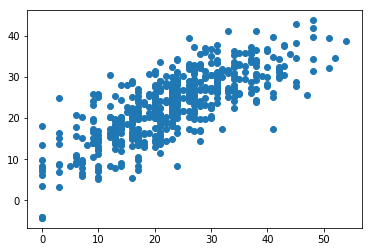

In [75]:
plt.scatter(Y, lm.predict(X))

In [76]:
d1 = data.groupby(by = "Team").mean()
X_d1 = d1[FEATURE_LIST]
Y_d1 = d1[LABEL_COL]

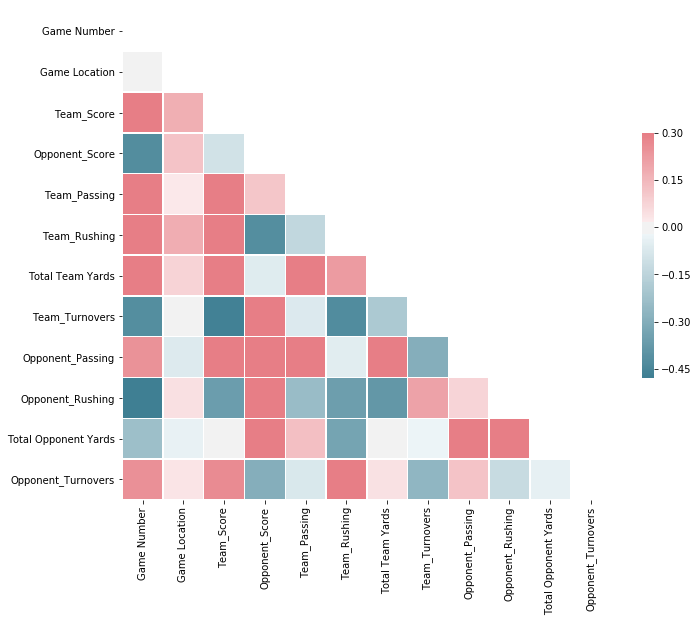

In [84]:
corr = d1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

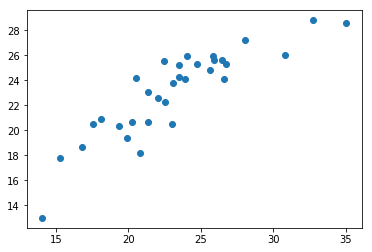

In [77]:
plt.scatter(Y_d1, lm.predict(X_d1))

In [78]:
d1.loc['Los Angeles Rams']['Game Location'] = 1
x = d1.loc['Los Angeles Rams']
y = x[LABEL_COL]
x = x[FEATURE_LIST]

In [79]:
lm.predict(x.values.reshape(1, -1))

array([28.88929213])

In [80]:
d1.loc['New England Patriots']['Game Location'] = 0
x = d1.loc['New England Patriots']
y = x[LABEL_COL]
x = x[FEATURE_LIST]

In [81]:
lm.predict(x.values.reshape(1, -1))

array([27.17751352])